In [1]:
import model
import numpy as np
import tensorflow as tf
import image_preprocessing
import matplotlib.pyplot as plt

In [2]:
import os
def print_directory_contents(directory):
    try:
        # List all files and directories in the specified directory
        entries = os.listdir(directory)
        print(f"Contents of '{directory}':")
        for entry in entries:
            print(entry)
    except FileNotFoundError:
        print(f"Directory '{directory}' not found.")
    except PermissionError:
        print(f"Permission denied to access '{directory}'.")

print_directory_contents("data/train")

Contents of 'data/train':
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_C

In [3]:
import importlib
importlib.reload(image_preprocessing)

num_samples = 3200
input_shape = (128, 128, 3)
num_classes = 10
batch_size = 32


image_array, labels, label_encoder = image_preprocessing.create_numpy_dataset("data/train")
augmented_dataset = model.create_generator(image_array, labels, 
                                          batch_size=batch_size, 
                                          input_shape=input_shape)

print(image_array.shape)
print(labels.shape)

Classes: ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Northern_Leaf_Blight' 'Corn_(maize)___healthy'
 'Pepper,_bell___healthy' 'Squash___Powdery_mildew'
 'Strawberry___Leaf_scorch' 'Tomato___Late_blight' 'Tomato___healthy']
(2447, 128, 128, 3)
(2447,)


Batch images shape: (32, 128, 128, 3)
Batch labels shape: (32,)


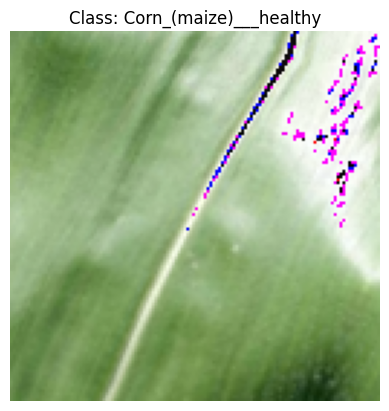

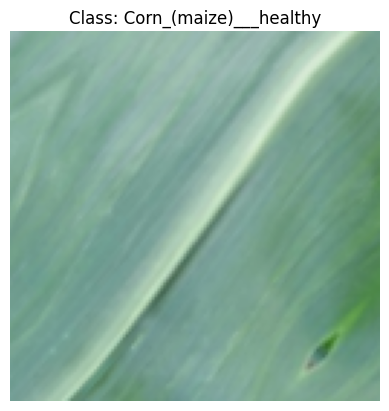

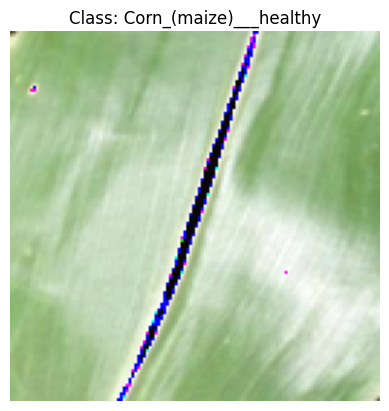

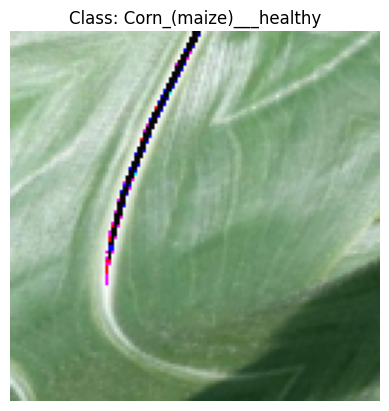

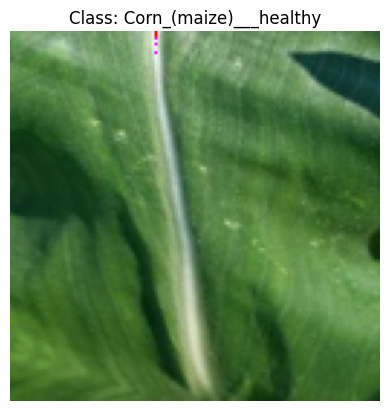

In [4]:
for batch_images, batch_labels in augmented_dataset.take(1):  # Take one batch
    print("Batch images shape:", batch_images.shape)
    print("Batch labels shape:", batch_labels.shape)

    for i in range(5):
        img = batch_images[i].numpy()
        img = (img * 255).astype("uint8")
        plt.imshow(img)
        plt.title(f"Class: {label_encoder.inverse_transform([batch_labels[i].numpy()])[0]}")
        plt.axis('off')
        plt.show()

In [7]:
import collections

def analyze_class_distribution(dataset):
    """
    Analyzes the class distribution in a TensorFlow dataset.

    Parameters:
        dataset (tf.data.Dataset): The dataset to analyze.

    Returns:
        None: Prints the class counts.
    """
    class_counts = collections.Counter()

    # Iterate over the dataset to count labels
    for _, batch_labels in dataset:
        # Convert batch_labels to numpy and flatten to ensure 1D
        labels = batch_labels.numpy().flatten()
        class_counts.update(labels)

    # Display the class distribution
    print("Class Distribution:")
    for label, count in class_counts.items():
        print(f"Class {label}: {count} samples")

# Analyze the augmented dataset
analyze_class_distribution(augmented_dataset)

Class Distribution:
Class 2: 1831 samples
Class 0: 213 samples
Class 1: 235 samples
Class 6: 146 samples
Class 4: 19 samples
Class 7: 1 samples
Class 5: 1 samples
Class 3: 1 samples
